# Compressing Data via Dimensionality Reduction	

## 1. Unsupervised dimensionality reduction via principal component analysis	

#### Total and explained variance


In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('../code/datasets/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#### Compute covariance matrix and eigenvectors 

In [5]:
import numpy as np  

In [6]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
        0.16831254,  0.21432212,  0.2399553 ])

In [7]:
total = np.sum(eigen_vals)
var_exp = [i/total for i in sorted(eigen_vals, reverse=True)] #explained variances
cum_var_exp = np.cumsum(var_exp)
var_exp[:3]

[0.37329647723490678, 0.18818926106599568, 0.10896790724757796]

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

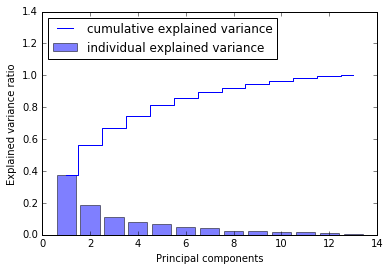

In [9]:
plt.bar(range(1,len(var_exp)+1),var_exp, alpha=0.5, 
        align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp,
        where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.ylim([0,1.4])
plt.legend(loc='upper left')
plt.show()

#### Feature transformation	

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [11]:
# experiment of sort behavior
a = [(2,1),(3,2),(2,4),(7,3)]
a.sort(reverse=True)
print a

[(7, 3), (3, 2), (2, 4), (2, 1)]


In [12]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))
print "Matrix W (projection matrix):\n",w

Matrix W (projection matrix):
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [13]:
print X_train_std.shape, w.shape
X_train_pca =  X_train_std.dot(w)
X_train_pca.shape

(124, 13) (13, 2)


(124, 2)

In [14]:
# transform a sample onto the PCA subspace
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

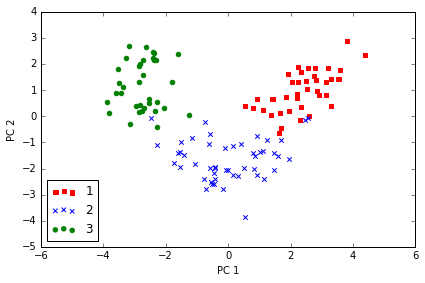

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1], color=c, marker=m, label=l)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

note: Although the class labels information is encoded for the purpose of illustration in the preceding scatter plot, we have to keep in mind that PCA is an unsupervised technique that doesn't use class label information.

#### Principal component analysis in scikit-learn	

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(8,5))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

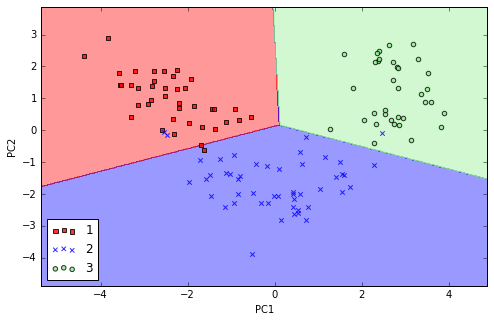

In [18]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

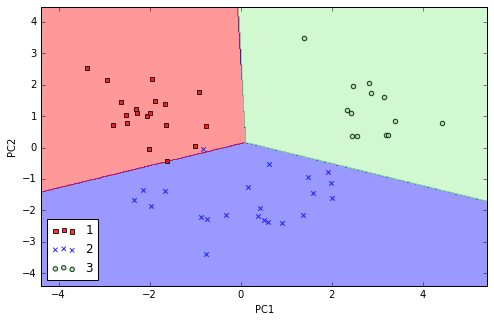

In [19]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [20]:
# calculating explained variance ratios
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
print pca.explained_variance_ratio_
print np.cumsum(pca.explained_variance_ratio_)

[ 0.37329648  0.18818926  0.10896791  0.07724389  0.06478595  0.04592014
  0.03986936  0.02521914  0.02258181  0.01830924  0.01635336  0.01284271
  0.00642076]
[ 0.37329648  0.56148574  0.67045365  0.74769754  0.81248349  0.85840362
  0.89827298  0.92349212  0.94607393  0.96438317  0.98073654  0.99357924
  1.        ]


## 2. Supervised data compression via linear discriminant analysis	

#### Computing the scatter matrices	

Computing mean vectors

In [21]:
np.set_printoptions(precision=4)
# These options determine the way floating point numbers, arrays and 
# other NumPy objects are displayed.
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
                    X_train_std[y_train==label],axis=0))
mean_vecs

[array([ 0.9259, -0.3091,  0.2592, -0.7989,  0.3039,  0.9608,  1.0515,
        -0.6306,  0.5354,  0.2209,  0.4855,  0.798 ,  1.2017]),
 array([-0.8727, -0.3854, -0.4437,  0.2481, -0.2409, -0.1059,  0.0187,
        -0.0164,  0.1095, -0.8796,  0.4392,  0.2776, -0.7016]),
 array([ 0.1637,  0.8929,  0.3249,  0.5658, -0.01  , -0.9499, -1.228 ,
         0.7436, -0.7652,  0.979 , -1.1698, -1.3007, -0.3912])]

Within-Class Scatter Matrix

In [65]:
d = 13 # number of features
S_W =  np.zeros((d,d))
for label,mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

Class labels in the training set is not uniformly distributed. So its better to compute the normalized version of the scatter matrix which is covariance matrix.

In [60]:
print 'Class label distribution: %s'%np.bincount(y_train)[1:]

Class label distribution: [40 49 35]


In [ ]:
Covariance matrix

In [68]:
d = 13 # number of features
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

Between-class Scatter Matrix

$  \boldsymbol{S_b}  = \sum\limits_{i=1}^cN_i\boldsymbol{(m_i-m)(m_i-m)}^{T}$

In [85]:
mean_overall = np.mean(X_train_std,axis=0)
d = 13 # number of features
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B = n * (mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

#### Selecting linear discriminants for the new feature subspace	

Compute the matrix $ \boldsymbol{S_W^{-1}S_B}$

In [86]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))  

Sort eigenvalues in decsending order

Projecting samples onto the new feature space	
LDA via scikit-learn	
3. Using kernel principal component analysis for nonlinear mappings	
Kernel functions and the kernel trick	
Implementing a kernel principal component analysis in Python	
Example 1 – separating half-moon shapes	
Example 2 – separating concentric circles	
Projecting new data points	
Kernel principal component analysis in scikit-learn	